# Libraries

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features.pca import PCADecomposition

# Importing Data

In [352]:
fifa = pd.read_csv('../data/fifa19.csv')
pd.set_option('display.max_columns', None)

In [353]:
fifa_b = fifa.copy()

In [354]:
fifa.shape

(18207, 89)

In [355]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [349]:
fifa['Overall'].dtypes

dtype('int64')

# Exploratory Data Analysis

In [356]:
fifa_eda = fifa.copy()

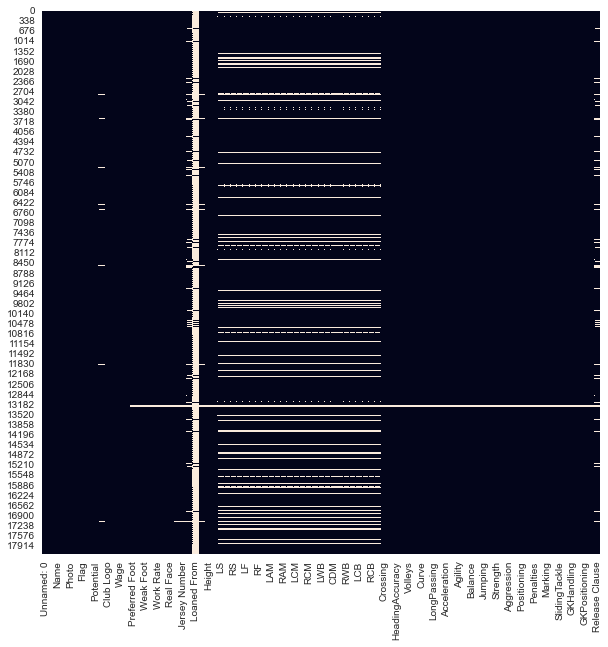

In [357]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(fifa_eda.isnull(), cbar=False);

# Data Cleaning and Transformation

## Dropping some columns

* A copy of the dataset was made to use EDA techniques and prepare it for a Standardzation.

* Dropping some categorical columns that will not be useful in future clustering processes.

In [358]:
fifa_eda.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [359]:
#Selecting just data types = Float64
fifa_eda = fifa_eda.select_dtypes(['int64', 'float64'])

* Checking the rest of the columns and working on the null values

In [360]:
fifa_eda.head()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [361]:
fifa_eda.drop(columns= ['Unnamed: 0', 'ID', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number'], inplace=True, axis=1)

## Treating NaN

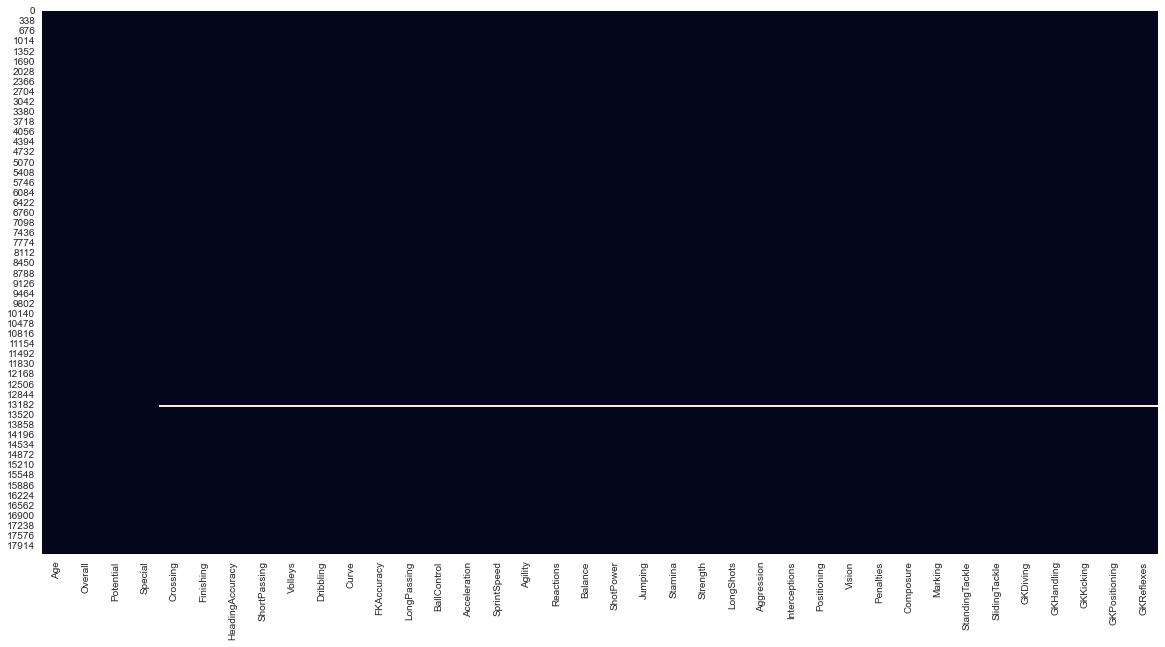

In [363]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(fifa_eda.isnull(), cbar=False);

In [371]:
fifa_eda.fillna(0, inplace=True)

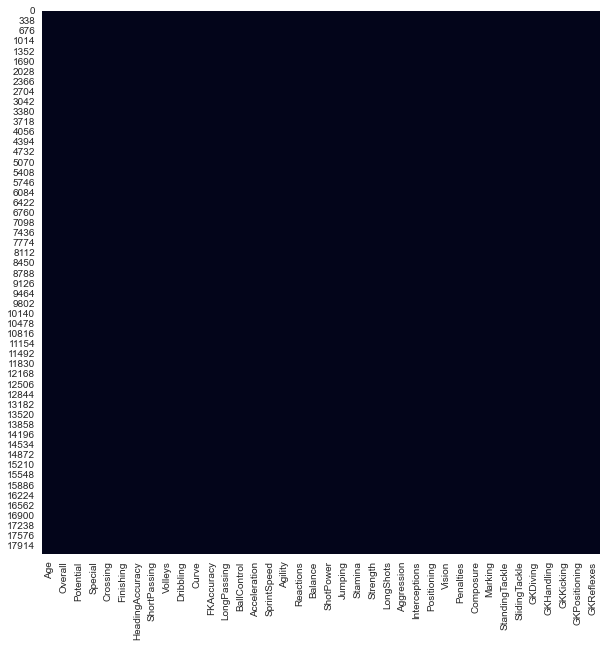

In [372]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(fifa_eda.isna(), cbar=False);

# Data Preprocessing


In [373]:
fifa_eda

,Age,Overall,Potential,Special,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1307,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,19,47,63,1098,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,16,47,67,1189,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,17,47,66,1228,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [375]:
fifa_eda[fifa_eda.isna().any(axis=1)]

,Age,Overall,Potential,Special,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes


In [376]:
scaler = StandardScaler()
fifa_eda_scale = scaler.fit_transform(fifa_eda)

# Data Clustering with KMEANS

In [377]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [378]:
fifa['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

## K Elbow

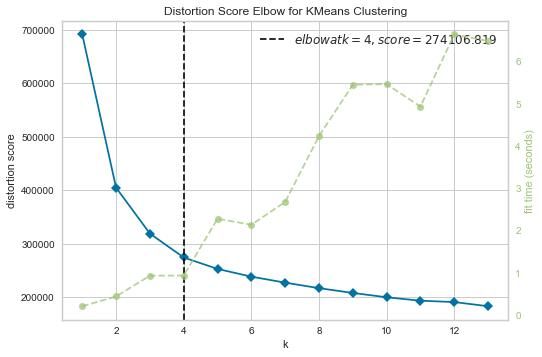

In [379]:
#Elbow model to take a view of a numbers of clusters by distortion
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,14))

visualizer.fit(fifa_eda_scale)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Silhouette

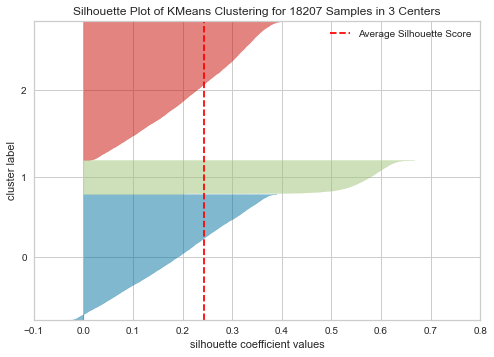

In [380]:
model = KMeans(3).fit(fifa_eda_scale)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(fifa_eda_scale)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

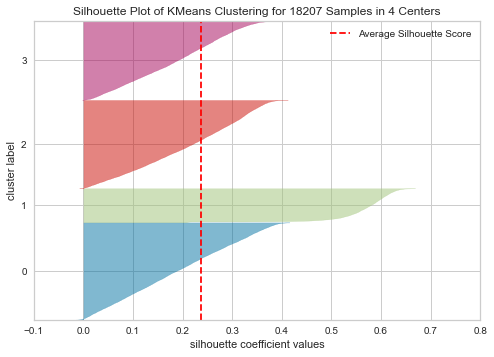

In [381]:
model = KMeans(4).fit(fifa_eda_scale)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(fifa_eda_scale)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

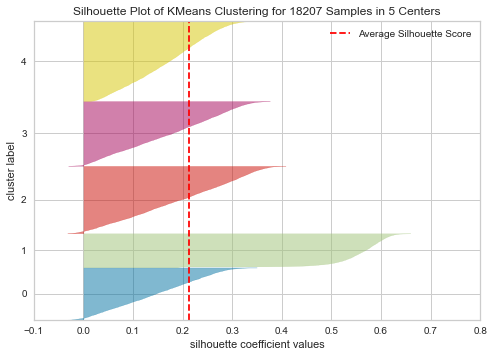

In [382]:
model = KMeans(5).fit(fifa_eda_scale)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(fifa_eda_scale)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Clustering by Attributes

In [431]:
kmeans = KMeans(n_clusters = 6)
fifa_attr_kmeans = kmeans.fit(fifa_eda_scale)
fifa['labels_KMeans'] = fifa_attr_kmeans.labels_

In [432]:
fifa['labels_KMeans'].value_counts()

4    4364
0    3450
1    2961
5    2949
3    2409
2    2074
Name: labels_KMeans, dtype: int64

In [427]:
fifa[(fifa['labels_KMeans'] == 0)]['Position'].value_counts().head(10)

CM     691
LB     573
RB     540
ST     494
CDM    473
RM     446
LM     439
CAM    431
RCM    305
LCM    299
Name: Position, dtype: int64

In [428]:
fifa[(fifa['labels_KMeans'] == 1)]['Position'].value_counts().head(10)

CB     1634
RB      722
LB      707
RCB     562
LCB     542
CDM     460
CM      345
LDM      66
RDM      57
RCM      51
Name: Position, dtype: int64

In [429]:
fifa[(fifa['labels_KMeans'] == 2)]['Position'].value_counts()

GK    2025
Name: Position, dtype: int64

In [430]:
fifa[(fifa['labels_KMeans'] == 3)]['Position'].value_counts()

ST     1646
RM      640
LM      623
CAM     512
CM      358
LW      259
RW      247
LS      121
RS      118
CF       50
LCM      47
LB       42
RCM      35
RB       29
CDM      15
LDM      13
RDM      10
RWB       7
LAM       7
LF        6
LWB       4
RAM       4
RF        3
CB        3
RCB       1
LCB       1
Name: Position, dtype: int64

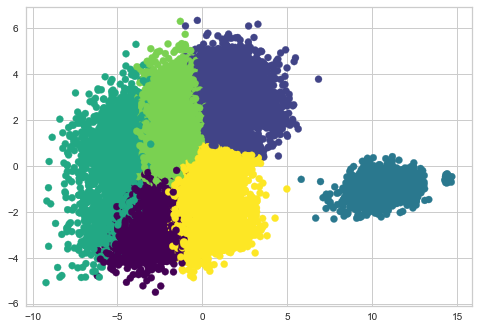

In [433]:
pca = PCA(9)
pca.fit(fifa_eda_scale)

pc1 = pca.transform(fifa_eda_scale)[:,0]
pc2 = pca.transform(fifa_eda_scale)[:,1]
plt.scatter(pc1, pc2, c=fifa['labels_KMeans'], cmap = 'viridis')

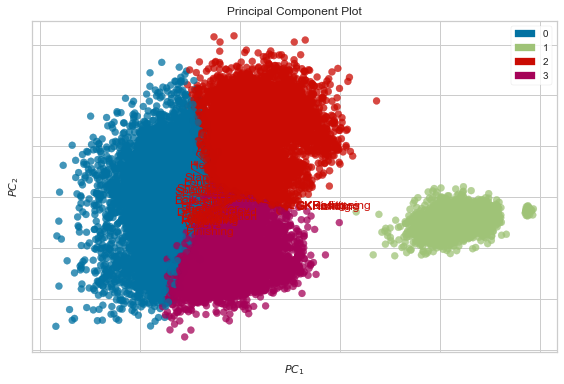

In [392]:

visualizer = PCADecomposition(scale=True, proj_features=True,)
visualizer.fit_transform(pd.DataFrame(fifa_eda_scale, columns=fifa_eda.columns), fifa['labels_KMeans'])
visualizer.show()

## Data Clustering by Positions

In [393]:
fifa_eda

,Age,Overall,Potential,Special,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1307,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,19,47,63,1098,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,16,47,67,1189,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,17,47,66,1228,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


## Key Attributes for ST

In [470]:
fifa_eda_st = fifa_eda[['Finishing', 'Dribbling', 'ShotPower', 'Penalties']]

In [472]:
scaler = StandardScaler()
fifa_st_scale = scaler.fit_transform(fifa_eda_st)

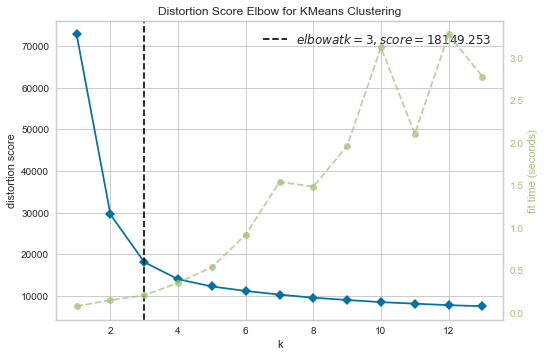

In [473]:
#Elbow model to take a view of a numbers of clusters by distortion
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,14))

visualizer.fit(fifa_st_scale)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [476]:
kmeans = KMeans(n_clusters = 3)
fifa_st_kmeans = kmeans.fit(fifa_st_scale)
fifa['ST_Label'] = fifa_st_kmeans.labels_

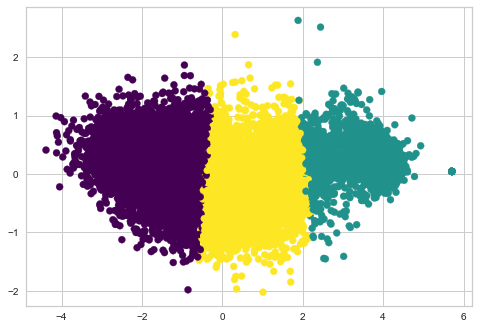

In [477]:
pca = PCA(2)
pca.fit(fifa_eda_st_scale)

pc1 = pca.transform(fifa_st_scale)[:,0]
pc2 = pca.transform(fifa_st_scale)[:,1]
plt.scatter(pc1, pc2, c=fifa['ST_Label'], cmap = 'viridis')

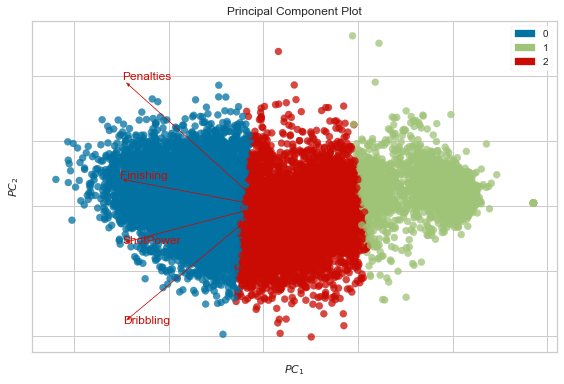

In [478]:
visualizer = PCADecomposition(scale=True, proj_features=True,)
visualizer.fit_transform(pd.DataFrame(fifa_st_scale, columns=fifa_eda_st.columns), fifa['ST_Label'])
visualizer.show()

In [481]:
fifa_over = fifa_eda[['Age', 'Overall', 'Potential', 'Special']]

In [483]:
scaler = StandardScaler()
fifa_over_scale = scaler.fit_transform(fifa_over)

C:\Users\lzapa\AppData\Roaming\Python\Python37\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\lzapa\AppData\Roaming\Python\Python37\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\lzapa\AppData\Roaming\Python\Python37\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


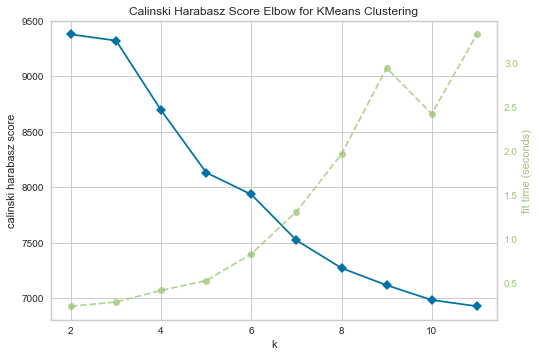

In [487]:
#Elbow model to take a view of a numbers of clusters by distortion
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz')

visualizer.fit(fifa_over_scale)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [488]:
kmeans = KMeans(n_clusters = 6)
fifa_over_kmeans = kmeans.fit(fifa_over_scale)
fifa['Over_Label'] = fifa_over_kmeans.labels_

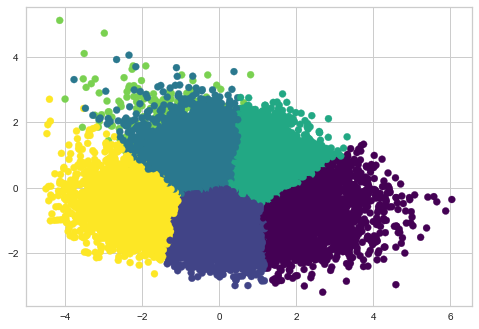

In [489]:
pca = PCA(2)
pca.fit(fifa_over_scale)

pc1 = pca.transform(fifa_over_scale)[:,0]
pc2 = pca.transform(fifa_over_scale)[:,1]
plt.scatter(pc1, pc2, c=fifa['Over_Label'], cmap = 'viridis')

# Answering

In [316]:
fifa[(fifa['Club'] == 'Liverpool')].groupby(by = 'Position').mean()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,labels_KMeans
Position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CAM,3746.250000,204909.00,24.250000,77.500000,82.750000,2002.5,2.500000,3.500000,4.000000,26.000000,68.750000,71.500000,60.500000,77.500000,70.000000,80.0,75.000000,66.500000,71.500000,80.000000,77.000000,74.50,77.250000,76.000000,82.000000,75.250000,65.750000,72.750000,66.250000,70.750000,60.250000,57.000000,73.750000,75.500000,66.500000,78.500000,52.75,58.000000,48.250000,11.500000,10.750000,10.500000,8.750000,10.250000,1.500000
CB,5091.333333,221029.00,22.666667,73.000000,81.333333,1646.0,1.333333,2.666667,2.333333,31.666667,51.000000,28.333333,70.666667,68.333333,34.666667,55.0,44.333333,28.666667,58.666667,59.000000,62.333333,68.00,53.666667,71.000000,56.666667,50.666667,65.333333,68.666667,75.666667,31.666667,68.333333,74.000000,42.333333,54.333333,37.666667,66.333333,72.00,75.333333,71.333333,9.333333,11.333333,10.000000,8.666667,9.000000,1.333333
CDM,7872.500000,225792.00,22.500000,71.500000,79.500000,1893.5,2.000000,2.500000,2.500000,34.000000,62.000000,54.000000,62.000000,73.500000,43.500000,65.0,56.000000,47.500000,70.500000,69.500000,69.500000,70.00,73.000000,70.500000,73.500000,70.500000,72.000000,74.000000,64.500000,56.000000,76.000000,68.000000,54.000000,62.500000,73.500000,69.500000,66.00,74.000000,72.500000,9.000000,10.500000,9.500000,10.000000,11.000000,1.500000
CM,4063.333333,200906.50,24.500000,75.166667,81.833333,1964.0,1.833333,3.833333,3.500000,28.666667,67.666667,62.166667,53.166667,79.000000,61.666667,77.0,67.333333,61.000000,72.000000,78.000000,70.333333,67.50,77.333333,73.333333,77.000000,72.000000,60.500000,76.500000,63.333333,64.166667,76.000000,67.000000,68.000000,75.666667,63.166667,76.000000,60.00,64.333333,63.500000,8.166667,11.000000,9.166667,8.500000,8.500000,1.666667
GK,5387.333333,204880.00,24.666667,74.333333,81.666667,1181.0,2.333333,2.666667,1.000000,32.666667,15.333333,12.333333,15.666667,37.666667,16.333333,20.0,17.333333,16.333333,32.333333,23.666667,48.000000,45.00,37.333333,71.333333,43.333333,29.000000,57.666667,30.666667,66.666667,14.666667,29.000000,15.333333,10.666667,46.333333,27.000000,58.666667,9.00,17.333333,15.000000,74.333333,70.666667,67.000000,72.000000,76.666667,3.000000
LB,717.500000,210916.50,24.500000,79.500000,83.000000,2026.0,1.500000,2.500000,3.000000,10.500000,82.000000,58.000000,62.000000,75.000000,33.500000,76.0,66.500000,35.000000,66.000000,78.500000,83.000000,86.50,81.000000,76.500000,80.500000,73.500000,72.500000,85.000000,63.500000,67.000000,80.500000,76.000000,67.500000,66.000000,54.500000,68.000000,74.00,77.000000,77.000000,10.500000,11.000000,9.500000,8.500000,12.500000,2.000000
LCB,59.000000,203376.00,26.000000,86.000000,88.000000,2046.0,3.000000,3.000000,2.000000,4.000000,53.000000,52.000000,82.000000,76.000000,45.000000,70.0,60.000000,70.000000,78.000000,73.000000,74.000000,77.00,61.000000,85.000000,49.000000,81.000000,85.000000,71.000000,92.000000,64.000000,81.000000,86.000000,41.000000,59.000000,62.000000,83.000000,88.00,89.000000,84.000000,13.000000,10.000000,13.000000,11.000000,11.000000,2.000000
LM,58.000000,208722.00,26.000000,86.000000,87.000000,2110.0,3.000000,4.000000,4.000000,10.000000,73.000000,84.000000,62.000000,79.000000,71.000000,87.0,74.000000,64.000000,71.000000,86.000000,95.000000,93.00,91.000000,86.000000,86.000000,82.000000,75.000000,84.000000,67.000000,74.000000,73.000000,35.000000,87.000000,82.000000,71.000000,80.000000,42.00,42.000000,38.000000,10.000000,10.000000,15.000000,7.000000,14.000000,2.000000
RB,7

In [315]:
fifa[(fifa['Club'] == 'Liverpool') & (fifa['labels_KMeans'] == 2)]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,labels_KMeans
26,26,209331,M. Salah,26,https://cdn.sofifa.org/players/4/19/209331.png,Egypt,https://cdn.sofifa.org/flags/111.png,88,89,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,€69.5M,€255K,2146,Left,3.0,3.0,4.0,High/ Medium,PLAYER_BODY_TYPE_25,Yes,RM,10.0,"Jul 1, 2017",NaN,2023,5'9,157lbs,83+3,83+3,83+3,87+3,86+3,86+3,86+3,87+3,86+3,86+3,86+3,86+3,80+3,80+3,80+3,86+3,70+3,66+3,66+3,66+3,70+3,66+3,57+3,57+3,57+3,66+3,78.0,90.0,59.0,82.0,73.0,89.0,83.0,60.0,72.0,88.0,94.0,91.0,91.0,91.0,88.0,77.0,68.0,84.0,70.0,83.0,63.0,55.0,90.0,82.0,61.0,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,€137.3M,2
58,58,208722,S. Mané,26,https://cdn.sofifa.org/players/4/19/208722.png,Senegal,https://cdn.sofifa.org/flags/136.png,86,87,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,€52M,€195K,2110,Right,3.0,4.0,4.0,High/ Medium,Lean,Yes,LM,10.0,"Jul 1, 2016",NaN,2023,5'9,152lbs,81+3,81+3,81+3,84+3,84+3,84+3,84+3,84+3,83+3,83+3,83+3,83+3,77+3,77+3,77+3,83+3,66+3,63+3,63+3,63+3,66+3,62+3,55+3,55+3,55+3,62+3,73.0,84.0,62.0,79.0,71.0,87.0,74.0,64.0,71.0,86.0,95.0,93.0,91.0,86.0,86.0,82.0,75.0,84.0,67.0,74.0,73.0,35.0,87.0,82.0,71.0,80.0,42.0,42.0,38.0,10.0,10.0,15.0,7.0,14.0,€102.7M,2
59,59,203376,V. van Dijk,26,https://cdn.sofifa.org/players/4/19/203376.png,Netherlands,https://cdn.sofifa.org/flags/34.png,86,88,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,€44.5M,€165K,2046,Right,3.0,3.0,2.0,Medium/ Medium,Normal,Yes,LCB,4.0,"Jan 1, 2018",NaN,2023,6'4,203lbs,68+3,68+3,68+3,65+3,66+3,66+3,66+3,65+3,67+3,67+3,67+3,67+3,71+3,71+3,71+3,67+3,76+3,80+3,80+3,80+3,76+3,78+3,85+3,85+3,85+3,78+3,53.0,52.0,82.0,76.0,45.0,70.0,60.0,70.0,78.0,73.0,74.0,77.0,61.0,85.0,49.0,81.0,85.0,71.0,92.0,64.0,81.0,86.0,41.0,59.0,62.0,83.0,88.0,89.0,84.0,13.0,10.0,13.0,11.0,11.0,€87.9M,2
61,61,201942,Roberto Firmino,26,https://cdn.sofifa.org/players/4/19/201942.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,87,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,€53M,€195K,2187,Right,3.0,4.0,4.0,High/ High,Lean,Yes,CAM,9.0,"Jul 6, 2015",NaN,2023,5'11,168lbs,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,82+3,82+3,82+3,83+3,72+3,73+3,73+3,73+3,72+3,69+3,67+3,67+3,67+3,69+3,72.0,87.0,77.0,86.0,81.0,87.0,80.0,65.0,75.0,88.0,78.0,77.0,80.0,86.0,81.0,81.0,81.0,90.0,74.0,76.0,73.0,58.0,87.0,85.0,72.0,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,€104.7M,2
118,118,209499,Fabinho,24,https://cdn.sofifa.org/players/4/19/209499.png,Brazil,https://cdn.sofifa.org/flags/54.png,84,88,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,€34M,€120K,2164,Right,3.0,2.0,3.0,Medium/ Medium,Lean,No,CDM,3.0,"Jul 1, 2018",NaN,2023,6'2,172lbs,73+3,73+3,73+3,75+3,75+3,75+3,75+3,75+3,76+3,76+3,76+3,77+3,79+3,79+3,79+3,77+3,82+3,83+3,83+3,83+3,82+3,82+3,82+3,82+3,82+3,82+3,79.0,66.0,75.0,83.0,47.0,76.0,71.0,53.0,78.0,82.0,69.0,72.0,69.0,83.0,67.0,78.0,75.0,92.0,79.0,65.0,85.0,84.0,70.0,75.0,91.0,84.0,83.0,86.0,84.0,13.0,12.0,6.0,8.0,8.0,€67.2M,2
161,161,220971,N. Keïta,23,https://cdn.sofifa.org/players/4/19/220971.png,Guinea,https://cdn.sofifa.org/flags/118.png,83,88,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,€34M,€120K,2082,Right,2.0,4.0,4.0,High/ Medium,Lean,Yes,CM,8.0,"Jul 1, 2018",NaN,2023,5'8,141lbs,73+2,73+2,73+2,79+2,79+2,79+2,79+2,79+2,8